In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fl = np.loadtxt("rr.dat")
print(fl)

[[-0.93090768 -0.25634033  0.        ]
 [-0.6554842   0.34197275  1.        ]
 [ 0.21715572 -0.96416096  0.        ]
 ...
 [ 0.7075099   0.14860755  1.        ]
 [-0.62854047  0.85537131  1.        ]
 [ 0.80633731 -0.46307536  0.        ]]


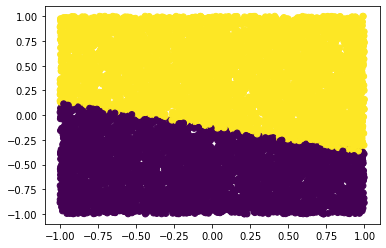

In [3]:
plt.scatter(fl[:, 0], fl[:, 1], c=fl[:, 2])
plt.show()

In [4]:
import torch as tch
from sklearn.neural_network import MLPClassifier as MLPC

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.9989


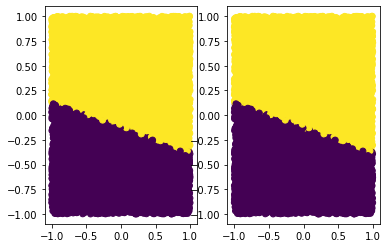

In [5]:
clf_mlp = MLPC(solver="adam", hidden_layer_sizes=(1)).fit(fl[:,:2], fl[:, 2])
y = clf_mlp.predict(fl[:,:2])
print(clf_mlp.score(fl[:,:2], fl[:, 2]))
fig, axs = plt.subplots(1, 2)
axs[0].scatter(fl[:, 0], fl[:, 1], c=y)
axs[1].scatter(fl[:, 0], fl[:, 1], c=fl[:, 2])
plt.show()

In [6]:
'''
xten = []
yten = []
for i in fl:
  xten.append(float(i[0]))
  yten.append(float(i[1]))
wb = tch.tensor([[3.0], [3.0]], requires_grad=True)
x = tch.tensor([xten])
y = tch.tensor([yten])
a = 0.03
for i in range(1000):
  func = ((y-1./(1.+tch.exp(-(wb[0]*x+wb[1]))))**2).sum()
  func.backward()
  wb.data -= a*wb.grad
  wb.grad.zero_()
print(wb[0], wb[1])
'''

tensor([21.8162], grad_fn=<SelectBackward0>) tensor([-35.0642], grad_fn=<SelectBackward0>)


In [10]:
fl2 = np.loadtxt("res_oval.dat")
nr_num1 = 0
chk = False
while nr_num1 < 30:
  nr_num1 += 1
  nr_num2 = 0
  while nr_num2 < 30:
    nr_num2 += 1
    nr_num3 = 0
    while nr_num3 < 30:
      nr_num3 += 1
      cnt = 0
      while cnt<3:
        cnt += 1
        clf_mlp = MLPC(solver="adam", hidden_layer_sizes=(nr_num1, nr_num2, nr_num3)).fit(fl2[:,:2], fl2[:, 2])
        if (clf_mlp.score(fl2[:,:2], fl2[:, 2])>=0.99):
          chk = True
          break
      if chk:
        break
    if chk:
      break
  if chk:
    break
print(clf_mlp.score(fl2[:,:2], fl2[:, 2]))
print(nr_num1)
print(nr_num2)
print(nr_num3)
print(cnt)
y2 = clf_mlp.predict(fl2[:,:2])
fig, axs = plt.subplots(1, 2)
axs[0].scatter(fl2[:, 0], fl2[:, 1], c=y2)
axs[1].scatter(fl2[:, 0], fl2[:, 1], c=fl2[:, 2])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.7367
30
30
3


In [13]:
from keras.models import Sequential
from keras.layers import Dense
import keras as ks

In [79]:
fl2 = np.loadtxt("res_oval.dat")
model=Sequential()
n = 20
for i in range(0, n, 2):
  model.add(Dense(n-i+4, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
y_train_cat = ks.utils.to_categorical(fl2[:,2])
model.fit(fl2[:,:2], y_train_cat, epochs=50)
y3 = model.predict(fl2[:,:2])
y3 = y3.argmax(axis=1)
fig, axs = plt.subplots(1, 2)
axs[0].scatter(fl2[:, 0], fl2[:, 1], c=y3)
axs[1].scatter(fl2[:, 0], fl2[:, 1], c=fl2[:, 2])
plt.show()

Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 0.3670 - accuracy: 0.7892
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1687 - accuracy: 0.9406
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9649
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9713
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0651 - accuracy: 0.9747
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0572 - accuracy: 0.9779
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0547 - accuracy: 0.9776
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0510 - accuracy: 0.9803
Epoch 9/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0483 - accuracy: 0.9801
Epoch 10/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0504 - accuracy: 0.9788

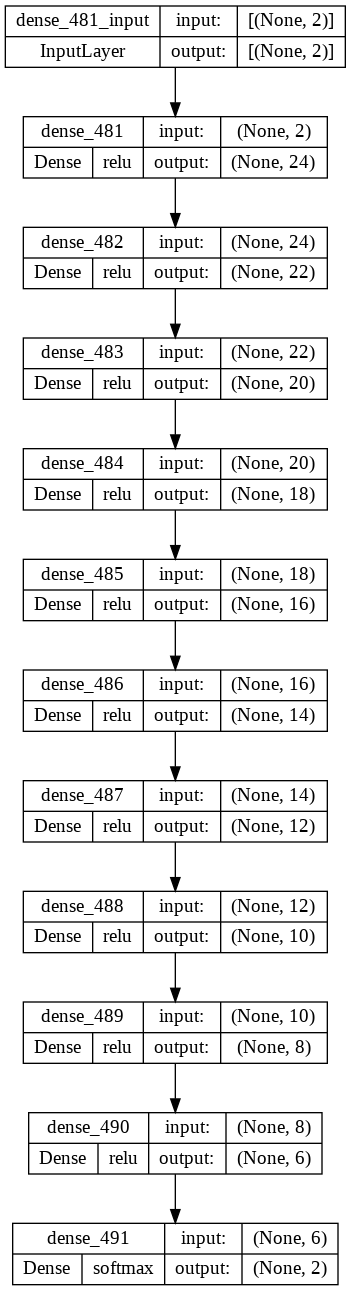

In [80]:
ks.utils.plot_model(model, 'model.png', show_shapes=True, show_layer_activations=True)